<a href="https://colab.research.google.com/github/aleeofficertraining/Data-Analytics-201/blob/main/final_201_Project_1_31Dec2022_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NYC Public School Regents Report

###School DBN: District Borough Number

###District: Assigned Number To School Based On Geographical Location

###Borough: {K: 'Brooklyn, X: 'Bronx', Q: 'Queens', M: 'Manhattan', R: 'Staten Island' }

###School Name: Institution Name

###School Level: Grade Levels Taught By The School

###Regents Exam: Statewide Standardized Exam

###Year: The Year of Testing and Examination

###Total Tested: Total Amount of Students Tested For Regents Exam

###Mean Score: Average Performance of Subset Students on Specified Regents Exam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.5 MB/s eta 0:00:00


In [2]:
sns.set()

In [3]:
missing_values = ['s']

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values, index_col=0)

In [5]:
df = df.dropna()
#drop all rows with missing values called 's' in entire dataset.  I decided to keep all rows with na, as needed other data found in the rows.

In [6]:
df.head()

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,na,na
01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,na,na
01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,na,na


In [7]:
df.columns

Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137101 entries, 01M034 to 84X717
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School Name                  137101 non-null  object 
 1   School Level                 137101 non-null  object 
 2   Regents Exam                 137101 non-null  object 
 3   Year                         137101 non-null  int64  
 4   Total Tested                 137101 non-null  int64  
 5   Mean Score                   137101 non-null  float64
 6   Number Scoring Below 65      137101 non-null  float64
 7   Percent Scoring Below 65     137101 non-null  float64
 8   Number Scoring 65 or Above   137101 non-null  float64
 9   Percent Scoring 65 or Above  137101 non-null  float64
 10  Number Scoring 80 or Above   137101 non-null  float64
 11  Percent Scoring 80 or Above  137101 non-null  float64
 12  Number Scoring CR            137101 non-null  object 
 13 

In [9]:
#review Common Core Algebra

In [10]:
df2 = df[['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score']]
#Subsetting the data 

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137101 entries, 01M034 to 84X717
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   School Name   137101 non-null  object 
 1   School Level  137101 non-null  object 
 2   Regents Exam  137101 non-null  object 
 3   Year          137101 non-null  int64  
 4   Total Tested  137101 non-null  int64  
 5   Mean Score    137101 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.3+ MB


In [12]:
df3 = df2[df2['Regents Exam'] == 'Common Core Algebra']

In [13]:
df3

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0
...,...,...,...,...,...,...
84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2


In [14]:
df4 = df3.loc[(df3['School Name'] == 'Francis Lewis High School') | (df3['School Name'] == 'Long Island City High School')]
#used the | operator for multiple values filtered, which are Francis Lewis High School and Long Island City High School.
#did internet search of Stack Overflow source: https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-values

In [15]:
#Take a look at only high School and only Common Core Algebra Regents Exam,
#df4 contains only Francis Lewis High School and Long Island City High School.


In [16]:
df4

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
School DBN,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2
...,...,...,...,...,...,...
30Q450,Long Island City High School,High school,Common Core Algebra,2017,145,69.5
30Q450,Long Island City High School,High school,Common Core Algebra,2017,127,62.4
30Q450,Long Island City High School,High school,Common Core Algebra,2017,705,64.3


In [17]:
df4.drop('School Level', axis = 1, inplace = True)
df4.drop('Regents Exam', axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df4.columns
#confirms columns removed.

Index(['School Name', 'Year', 'Total Tested', 'Mean Score'], dtype='object')

In [19]:
df4 = df4.rename(columns={'School Name' : 'High School'})
df4 = df4.rename(columns={'Total Tested' : 'Tot Students Tested: CCA'})
df4 = df4.rename(columns={'Mean Score' : 'Mean Score: CCA'})

In [20]:
df4.info()
#confirming Mean Score: CCA, and other column renaminings were kept

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   High School               74 non-null     object 
 1   Year                      74 non-null     int64  
 2   Tot Students Tested: CCA  74 non-null     int64  
 3   Mean Score: CCA           74 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB


In [21]:
df4.columns

Index(['High School', 'Year', 'Tot Students Tested: CCA', 'Mean Score: CCA'], dtype='object')

In [22]:
pd.options.display.max_rows = 80
#display up to 80 rows
#https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [23]:
df4.duplicated(keep=False)
# source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# this shows All rows are unique, no duplicates-- returns all False answers, none True

School DBN
26Q430    False
26Q430    False
26Q430    False
30Q450    False
30Q450    False
30Q450    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
30Q450    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
26Q430    False
30Q450    False
30Q450    False
30Q450    Fal

In [24]:
df4.index = [np.arange(len(df4.index)), df4.index]
print (df4)
#add unique index column 0, 1, 2, 3, etc., as sns needs unique indices.  School DBN index is not unique.

                                High School  Year  Tot Students Tested: CCA  \
   School DBN                                                                 
0  26Q430         Francis Lewis High School  2015                       541   
1  26Q430         Francis Lewis High School  2016                       900   
2  26Q430         Francis Lewis High School  2017                       916   
3  30Q450      Long Island City High School  2015                       599   
4  30Q450      Long Island City High School  2016                       942   
5  30Q450      Long Island City High School  2017                      1061   
6  26Q430         Francis Lewis High School  2015                       433   
7  26Q430         Francis Lewis High School  2015                       108   
8  26Q430         Francis Lewis High School  2016                       745   
9  26Q430         Francis Lewis High School  2016                       155   
10 26Q430         Francis Lewis High School  2017   

In [25]:
df4.describe()
#descriptive statistics for both schools

,Year,Tot Students Tested: CCA,Mean Score: CCA
count,74.000000,74.000000,74.000000
mean,2016.027027,333.662162,67.522973
std,0.827158,255.035924,8.628299
min,2015.000000,6.000000,50.700000
25%,2015.000000,130.750000,61.200000
50%,2016.000000,274.500000,66.050000
75%,2017.000000,489.750000,76.350000
max,2017.000000,1061.000000,84.800000


In [26]:
#Total students tested in common core algebra.
#Tot Students Tested: CCA

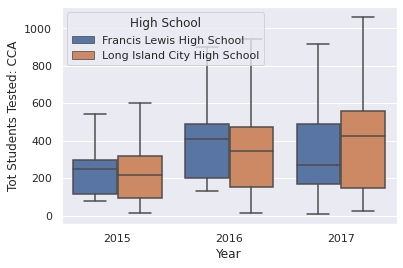

In [27]:
sns.boxplot(x='Year', y='Tot Students Tested: CCA', data= df4, hue='High School')

In [28]:
#sum values

In [29]:
df4.groupby(['High School', 'Year'])['Tot Students Tested: CCA'].sum()
# Sums of Total Students Tested in Common Core Algebra, 
# within each high school.
# 
#For Francis Lewis HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the Total Students Tested for 2015, 2016 and 2017?  

High School                   Year
Francis Lewis High School     2015    2665
                              2016    4436
                              2017    4580
Long Island City High School  2015    2995
                              2016    4710
                              2017    5305
Name: Tot Students Tested: CCA, dtype: int64

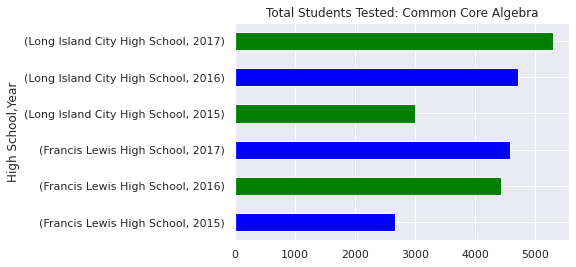

In [30]:
df4.groupby(['High School', 'Year'])['Tot Students Tested: CCA'].sum().plot(kind='barh' , title= 'Total Students Tested: Common Core Algebra' , color = ['blue' , 'green'])
#Bar chart

In [31]:
#mean values

In [32]:
df4.groupby(['High School', 'Year']).agg({'Tot Students Tested: CCA' : 'mean'})
#For Francis Lewis HS in Common Core Algebra, what were the mean Total Students Tested for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the mean Total Students Tested for 2015, 2016 and 2017?  

Tot Students Tested: CCA
High School                  Year                          
Francis Lewis High School    2015                242.272727
                             2016                403.272727
                             2017                352.307692
Long Island City High School 2015                230.384615
                             2016                362.307692
                             2017                408.076923

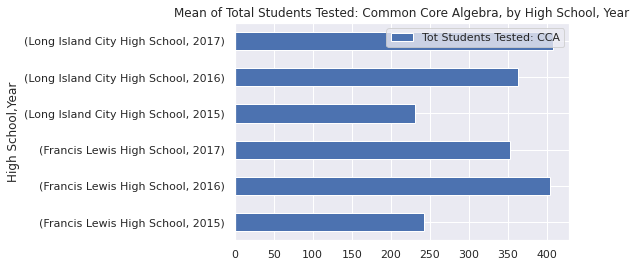

In [33]:
df4.groupby(['High School', 'Year']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Total Students Tested: Common Core Algebra, by High School, Year')
#Bar chart presenting Long Island first, then Francis Lewis

In [34]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'})
# Mean values of Total Students Tested in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do mean data compare between Francis Lewis and Long Island City HS's?  Francis Lewis was higher.
# For 2016, how do mean data compare between Francis Lewis and Long Island City HS's?  Francis Lewis was higher.
# For 2017, how do mean data compare between Francis Lewis and Long Island City HS's?  Long Island was higher.

Tot Students Tested: CCA
Year High School                                           
2015 Francis Lewis High School                   242.272727
     Long Island City High School                230.384615
2016 Francis Lewis High School                   403.272727
     Long Island City High School                362.307692
2017 Francis Lewis High School                   352.307692
     Long Island City High School                408.076923

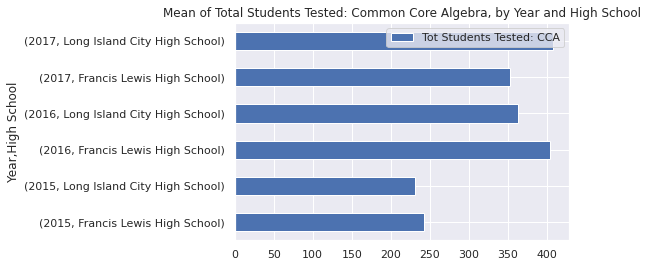

In [35]:
df4.groupby(['Year', 'High School']).agg({'Tot Students Tested: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Total Students Tested: Common Core Algebra, by Year and High School')
# Bar chart presenting by Year.  Within each year, both high schools are shown.

In [36]:
#Mean Scores for Common Core Algebra - total and average of Mean Scores
#Mean Score: CCA

In [37]:
df4.groupby(['High School', 'Year'])['Mean Score: CCA'].sum()
#For Francis Lewis HS in Common Core Algebra, what were the totals of Mean Scores for 2015, 2016 and 2017? 
#For Long Island City HS in Common Core Algebra, what were the totals of Mean Scores for 2015, 2016 and 2017?  

High School                   Year
Francis Lewis High School     2015     723.0
                              2016     845.3
                              2017    1019.9
Long Island City High School  2015     745.4
                              2016     816.8
                              2017     846.3
Name: Mean Score: CCA, dtype: float64

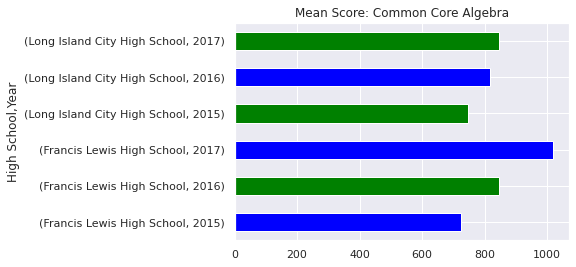

In [38]:
df4.groupby(['High School', 'Year'])['Mean Score: CCA'].sum().plot(kind='barh' , title= 'Mean Score: Common Core Algebra' , color = ['blue' , 'green'])
#Bar chart of totals

In [39]:
df4.groupby(['High School', 'Year']).agg({'Mean Score: CCA' : 'mean'})
#For Francis Lewis HS in Common Core Algebra, what were the averages of Mean Scores for 2015, 2016 and 2017? scores increased with each year.
#For Long Island City HS in Common Core Algebra, what were the averages of Mean Scores for 2015, 2016 and 2017?  scores increases with each year.

Mean Score: CCA
High School                  Year                 
Francis Lewis High School    2015        65.727273
                             2016        76.845455
                             2017        78.453846
Long Island City High School 2015        57.338462
                             2016        62.830769
                             2017        65.100000

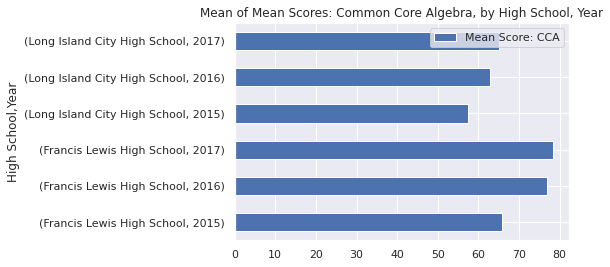

In [42]:
df4.groupby(['High School', 'Year']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Mean Scores: Common Core Algebra, by High School, Year')
#Bar chart 

In [43]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'})
# Mean values of Mean Scores in Common Core Algebra, 
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Mean Score: CCA
Year High School                                  
2015 Francis Lewis High School           65.727273
     Long Island City High School        57.338462
2016 Francis Lewis High School           76.845455
     Long Island City High School        62.830769
2017 Francis Lewis High School           78.453846
     Long Island City High School        65.100000

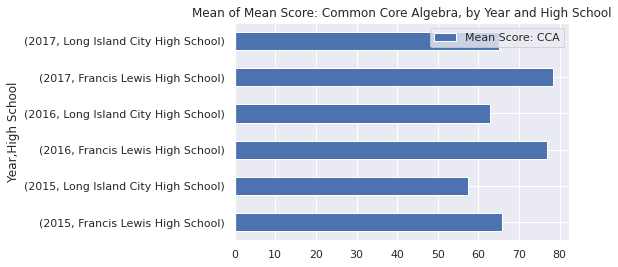

In [44]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'}).plot(kind='barh' , title= 'Mean of Mean Score: Common Core Algebra, by Year and High School')
#Bar chart

In [45]:
df4.groupby(['Year', 'High School']).agg({'Mean Score: CCA' : 'mean'})
# Mean values of Mean Scores in Common Core Algebra, 
# Comparing both high Schools by Year.
#
# For 2015, how do data compare between Francis Lewis and Long Island City HS's?
# For 2016, how do data compare between Francis Lewis and Long Island City HS's?
# For 2017, how do data compare between Francis Lewis and Long Island City HS's?

Mean Score: CCA
Year High School                                  
2015 Francis Lewis High School           65.727273
     Long Island City High School        57.338462
2016 Francis Lewis High School           76.845455
     Long Island City High School        62.830769
2017 Francis Lewis High School           78.453846
     Long Island City High School        65.100000

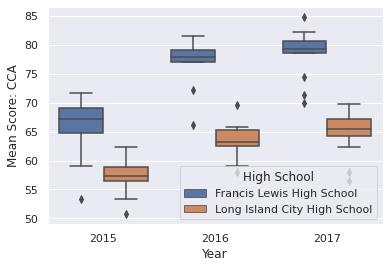

In [46]:
sns.boxplot(x='Year', y='Mean Score: CCA', data= df4, hue='High School')
#more granular boxplot of same but more granular, separately each of 2 schools data as color coded

In [47]:
#1. Both Francis Lewis and Long Island City High Schools performance in Common Core Algebra, had individual increases with each coming year in Mean Total Students Tested and Mean Score from 2015, to 2016, and to 2017 
#2. Francis Lewis High School had better performance, with greater values, than Long Island City High School in both Mean Total Students Tested and Mean Scores in Common Core Algebra in 2015, 2016, and 2017.

In [48]:
df5 = df[df['Regents Exam'] == 'Common Core Algebra']

In [49]:
df5

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48,98
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40,78.4
01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8,0.0,0.0,51.0,100.0,44.0,86.3,50,98
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9,14.0,60.9,9.0,39.1,0.0,0.0,2,8.7
01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0,6.0,27.3,16.0,72.7,2.0,9.1,15,68.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84X706,Harriet Tubman Charter School,K-8,Common Core Algebra,2017,15,82.6,0.0,0.0,15.0,100.0,12.0,80.0,15,100
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,8,87.9,0.0,0.0,8.0,100.0,7.0,87.5,8,100
84X717,Icahn Charter School,K-8,Common Core Algebra,2016,6,87.2,0.0,0.0,6.0,100.0,6.0,100.0,6,100


In [50]:
df6 = df5.loc[(df5['School Name'] == 'Francis Lewis High School') | (df5['School Name'] == 'Long Island City High School')]
#used the | operator for multiple values filtered, which are Francis Lewis High School and Long Island City High School.
#did internet search of Stack Overflow source: https://stackoverflow.com/questions/67928643/filter-a-column-by-multiple-val

In [51]:
df6

,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School DBN,,,,,,,,,,,,,,
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,541,67.1,181.0,33.5,360.0,66.5,58.0,10.7,266,49.2
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,900,77.8,90.0,10.0,810.0,90.0,478.0,53.1,744,82.7
26Q430,Francis Lewis High School,High school,Common Core Algebra,2017,916,79.3,70.0,7.6,846.0,92.4,533.0,58.2,796,86.9
30Q450,Long Island City High School,High school,Common Core Algebra,2015,599,57.4,423.0,70.6,176.0,29.4,2.0,0.3,63,10.5
30Q450,Long Island City High School,High school,Common Core Algebra,2016,942,63.2,443.0,47.0,499.0,53.0,49.0,5.2,310,32.9
30Q450,Long Island City High School,High school,Common Core Algebra,2017,1061,65.2,440.0,41.5,621.0,58.5,83.0,7.8,454,42.8
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,433,70.5,93.0,21.5,340.0,78.5,58.0,13.4,261,60.3
26Q430,Francis Lewis High School,High school,Common Core Algebra,2015,108,53.3,88.0,81.5,20.0,18.5,0.0,0.0,5,4.6
26Q430,Francis Lewis High School,High school,Common Core Algebra,2016,745,80.2,28.0,3.8,717.0,96.2,451.0,60.5,682,91.5


In [52]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  74 non-null     object 
 1   School Level                 74 non-null     object 
 2   Regents Exam                 74 non-null     object 
 3   Year                         74 non-null     int64  
 4   Total Tested                 74 non-null     int64  
 5   Mean Score                   74 non-null     float64
 6   Number Scoring Below 65      74 non-null     float64
 7   Percent Scoring Below 65     74 non-null     float64
 8   Number Scoring 65 or Above   74 non-null     float64
 9   Percent Scoring 65 or Above  74 non-null     float64
 10  Number Scoring 80 or Above   74 non-null     float64
 11  Percent Scoring 80 or Above  74 non-null     float64
 12  Number Scoring CR            74 non-null     object 
 13  Percent Scoring CR

In [53]:
#The data has: 
   # column for scores below 65.
    #column for scores 80 and above.

#This datasets does not have and needs: 
    # a column for scores beetween 65 and 80.  

#All it has is a column for scores 65 and above.
#So, to get scores between 65 and 80, 
# we need to subtract the column for scores 80 and above, from teh column for scores 65 and above.

#Add new column called 'Number Scoring 65 to 80'

In [54]:
df6['Number Scoring 65 to 80'] = df6['Number Scoring 65 or Above'] - df6['Number Scoring 80 or Above']
#create new column 'Number Scoring 65 to 80'

<ipython-input-54-be323e33db6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Number Scoring 65 to 80'] = df6['Number Scoring 65 or Above'] - df6['Number Scoring 80 or Above']


In [55]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Name                  74 non-null     object 
 1   School Level                 74 non-null     object 
 2   Regents Exam                 74 non-null     object 
 3   Year                         74 non-null     int64  
 4   Total Tested                 74 non-null     int64  
 5   Mean Score                   74 non-null     float64
 6   Number Scoring Below 65      74 non-null     float64
 7   Percent Scoring Below 65     74 non-null     float64
 8   Number Scoring 65 or Above   74 non-null     float64
 9   Percent Scoring 65 or Above  74 non-null     float64
 10  Number Scoring 80 or Above   74 non-null     float64
 11  Percent Scoring 80 or Above  74 non-null     float64
 12  Number Scoring CR            74 non-null     object 
 13  Percent Scoring CR

In [56]:
df6.columns

Index(['School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested',
       'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65',
       'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
       'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
       'Number Scoring CR', 'Percent Scoring CR', 'Number Scoring 65 to 80'],
      dtype='object')

In [57]:
df6.drop('School Level', axis = 1, inplace = True)
df6.drop('Regents Exam', axis = 1, inplace = True)
df6.drop('Number Scoring 65 or Above', axis = 1, inplace = True)
df6.drop('Percent Scoring Below 65', axis = 1, inplace = True)
df6.drop('Percent Scoring 65 or Above', axis = 1, inplace = True)
df6.drop('Percent Scoring 80 or Above', axis = 1, inplace = True)
df6.drop('Number Scoring CR', axis = 1, inplace = True)
df6.drop('Percent Scoring CR', axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 26Q430 to 30Q450
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   School Name                 74 non-null     object 
 1   Year                        74 non-null     int64  
 2   Total Tested                74 non-null     int64  
 3   Mean Score                  74 non-null     float64
 4   Number Scoring Below 65     74 non-null     float64
 5   Number Scoring 80 or Above  74 non-null     float64
 6   Number Scoring 65 to 80     74 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 4.6+ KB


In [59]:
df6.shape

(74, 7)

In [60]:
df6.columns

Index(['School Name', 'Year', 'Total Tested', 'Mean Score',
       'Number Scoring Below 65', 'Number Scoring 80 or Above',
       'Number Scoring 65 to 80'],
      dtype='object')

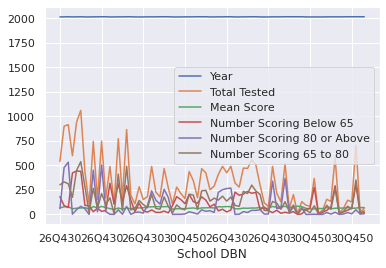

In [61]:
df6.plot()
#plot for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9611c1100>,
      dtype=object)

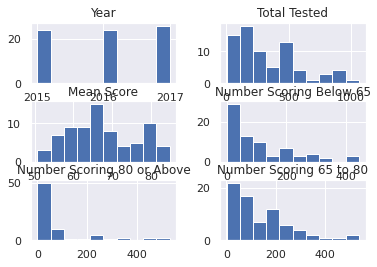

In [62]:
df6.hist()
#histogram showing combined performance for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

In [63]:
df6.index = [np.arange(len(df6.index)), df6.index]
print (df6)

                                School Name  Year  Total Tested  Mean Score  \
   School DBN                                                                 
0  26Q430         Francis Lewis High School  2015           541        67.1   
1  26Q430         Francis Lewis High School  2016           900        77.8   
2  26Q430         Francis Lewis High School  2017           916        79.3   
3  30Q450      Long Island City High School  2015           599        57.4   
4  30Q450      Long Island City High School  2016           942        63.2   
5  30Q450      Long Island City High School  2017          1061        65.2   
6  26Q430         Francis Lewis High School  2015           433        70.5   
7  26Q430         Francis Lewis High School  2015           108        53.3   
8  26Q430         Francis Lewis High School  2016           745        80.2   
9  26Q430         Francis Lewis High School  2016           155        66.2   
10 26Q430         Francis Lewis High School  2017   

In [64]:
df6.describe()
#descriptive statistics performance for both Francis Lewis and Long Island City Schools combined in Common Core Algebra

,Year,Total Tested,Mean Score,Number Scoring Below 65,Number Scoring 80 or Above,Number Scoring 65 to 80
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2016.027027,333.662162,67.522973,110.770270,81.081081,141.810811
std,0.827158,255.035924,8.628299,110.185217,130.717069,121.693043
min,2015.000000,6.000000,50.700000,0.000000,0.000000,1.000000
25%,2015.000000,130.750000,61.200000,28.250000,4.000000,51.250000
50%,2016.000000,274.500000,66.050000,68.000000,25.500000,98.500000
75%,2017.000000,489.750000,76.350000,172.250000,74.750000,205.500000
max,2017.000000,1061.000000,84.800000,443.000000,533.000000,538.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


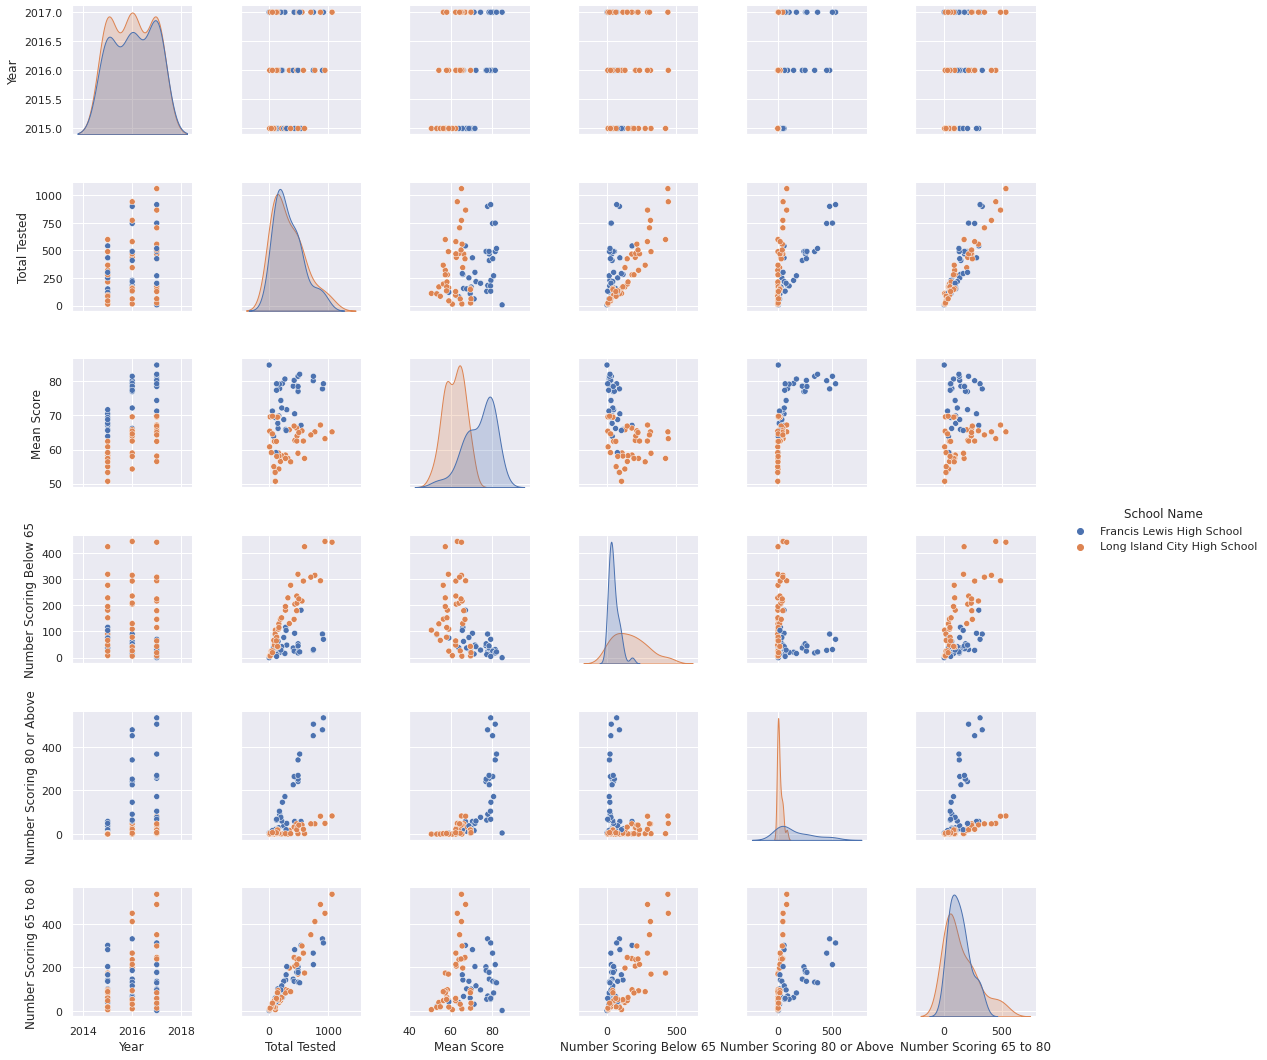

In [65]:
sns.pairplot(df6, 'School Name')
#same distribution plot lect 7 but separated by school

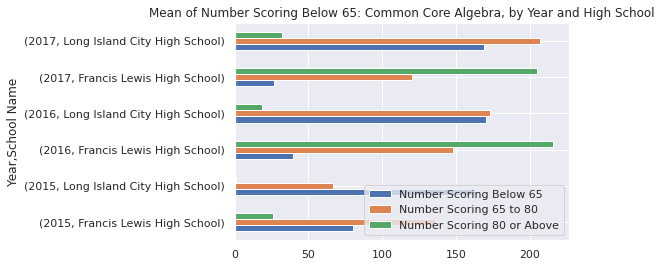

In [66]:
df6.groupby(['Year', 'School Name']).agg({'Number Scoring Below 65' : 'mean', 
                                          'Number Scoring 65 to 80' : 'mean', 
                                          'Number Scoring 80 or Above' : 'mean'}).plot(kind='barh' , title= 'Mean of Number Scoring Below 65: Common Core Algebra, by Year and High School')
#Bar chart 

In [67]:
df6.groupby(['Year', 'School Name']).agg({'Number Scoring Below 65' : 'mean', 'Number Scoring 65 to 80' : 'mean', 'Number Scoring 80 or Above' : 'mean'})
#mean scores for each of 3 categories for Common Core Algebra for Francis Lewis and Long Island City High Schools for 2015, 2016 and 2017

Number Scoring Below 65  \
Year School Name                                             
2015 Francis Lewis High School                   80.454545   
     Long Island City High School               162.692308   
2016 Francis Lewis High School                   39.272727   
     Long Island City High School               170.384615   
2017 Francis Lewis High School                   26.923077   
     Long Island City High School               169.230769   

                                   Number Scoring 65 to 80  \
Year School Name                                             
2015 Francis Lewis High School                  135.545455   
     Long Island City High School                66.923077   
2016 Francis Lewis High School                  148.000000   
     Long Island City High School               173.076923   
2017 Francis Lewis High School                  120.384615   
     Long Island City High School               206.923077   

                                   Number Scoring 80 or Above  
Year School Name                                               
2015 Francis Lewis High School                      26.272727  
     Long Island City High School                    0.769231  
2016 Francis Lewis High School                     216.000000  
     Long Island City High School                   18.846154  
2017 Francis Lewis High School                     205.000000  
     Long Island City High School                   31.923077

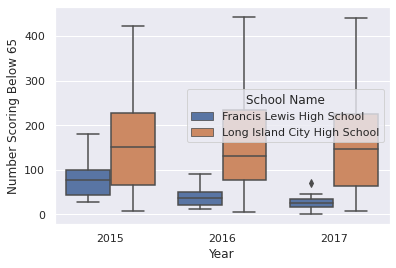

In [68]:
sns.boxplot(x='Year', y='Number Scoring Below 65', data= df6, hue='School Name')
#boxplot

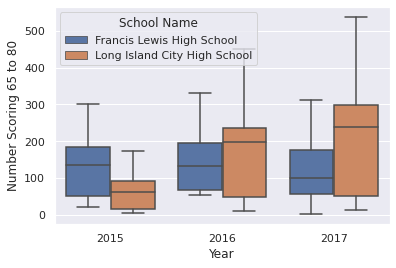

In [69]:
sns.boxplot(x='Year', y='Number Scoring 65 to 80', data= df6, hue='School Name')
#boxplot

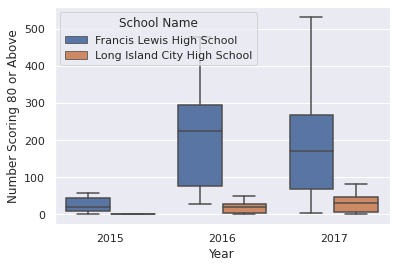

In [70]:
sns.boxplot(x='Year', y='Number Scoring 80 or Above', data= df6, hue='School Name')
#boxplot

In [71]:
df7 = {'School Year': [2015, 2015, 2016, 2016, 2017, 2017], 
       'School Name': ['Francis Lewis High School', 'Long Island City High School', 'Francis Lewis High School', 'Long Island City High School', 
                       'Francis Lewis High School', 'Long Island City High School'], 
       'Mean Number of Students Scoring Below 65': [80.4, 162.7, 39.3, 170.4, 26.9, 169.2],
       'Mean Number of Students Scoring Between 65 and 80': [135.5, 66.9, 148, 173.1, 120.4, 206.9], 
       'Mean Number of Students Scoring 80 or Above': [26.3, 0.8, 216.0, 18.8, 205.0, 31.9]}
df7 = pd.DataFrame(df7)
#create a table using the mean calculations, that way I don't have to rerun this entire project.

In [72]:
df7
#summary table with more accurate column titles comparing performance

,School Year,School Name,Mean Number of Students Scoring Below 65,Mean Number of Students Scoring Between 65 and 80,Mean Number of Students Scoring 80 or Above
0,2015,Francis Lewis High School,80.4,135.5,26.3
1,2015,Long Island City High School,162.7,66.9,0.8
2,2016,Francis Lewis High School,39.3,148.0,216.0
3,2016,Long Island City High School,170.4,173.1,18.8
4,2017,Francis Lewis High School,26.9,120.4,205.0
5,2017,Long Island City High School,169.2,206.9,31.9


In [73]:
#3. Francis Lewis HS had overall better performance across the 3 grade categories with Common Core Algebra than Long Island City HS.
#Francis Lewis HS had fewer mean scores below 65, overall about the same mean scores between 65 to 80, and more mean scores over 80.

##All 3 Summary conclusions together below.
##1. Both Francis Lewis and Long Island City High Schools performance in Common Core Algebra, had individual increases with each coming year in Mean Total Students Tested and Mean Score from 2015, to 2016, and to 2017 
##2. Francis Lewis High School had better performance, with greater values, than Long Island City High School in both Mean Total Students Tested and Mean Scores in Common Core Algebra in 2015, 2016, and 2017.
##3. Francis Lewis HS had overall better performance across the 3 grade categories with Common Core Algebra than Long Island City HS.
##Francis Lewis HS had fewer mean scores below 65, overall about the same mean scores between 65 to 80, and more mean scores over 80.

In [74]:
#end